# Analyse $J$-$K$ Model Spectral Data
    Alan Morningstar
    June 2017

In [3]:
using DataFrames
using PyPlot

In [8]:
# simulation parameters
Lx = 4;
Ly = 4;
J1 = 1.0;
J2 = 0.0;
K = 0.1;

# plot parameters
x = :Ssqrd;
y = :E;
cat = :Sz;
tlab = L"$\mathrm{Tower\ of\ States,}$  $L_x="*string(Lx)*L"$  $L_y="*string(Ly)*L"$  $J_1="*string(J1)*L"$  $J_2="*string(J2)*L"$  $K="*string(K)*L"$";
xlab = L"$S(S+1)$";
ylab = L"$E$";
plotFileName = ""; # "plots/TOS_S_Lx="*string(Lx)*"_Ly="*string(Ly)*"_J1="*string(J1)*"_J2="*string(J2)*"_K="*string(K)*"_cat="*string(cat)*".png";

#### load the data

In [9]:
dataFileName = "specData/Sz=0_Lx="*string(Lx)*"_Ly="*string(Ly)*"_J1="*string(J1)*"_J2="*string(J2)*"_K="*string(K)*".csv";
data = readtable(dataFileName);

#### plot tower of states

In [11]:
function categoryScatter(data::DataFrame,x::Symbol,y::Symbol,cat::Symbol,tlab,xlab,ylab,saveFileName::String = "")
    # unique values of cat
    valList = unique(data,cat)[cat];
    # plot different values of the category veriable
    for val in valList
        scatter(data[data[cat] .== val,:][x],data[data[cat] .== val,:][y],label = string(cat)*"="*string(val),marker = ".");
    end;
    # label the plot
    title(tlab);
    xlabel(xlab);
    ylabel(ylab);
    legend();
    # save plot
    if saveFileName != ""
        savefig(saveFileName);
    end;
end;

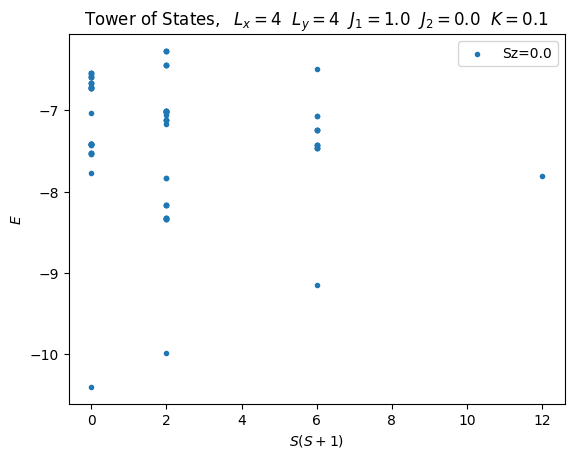

In [12]:
# plot tower of states
categoryScatter(data,x,y,cat,tlab,xlab,ylab,plotFileName);

#### spectral gaps

In [4]:
# simulation parameters
Lx = 4;
Ly = 4;
J1 = 1.0;
J2 = 0.4;
K = [i for i in 0.0:0.1:0.6];

# data
numFiles = length(K);
dataFileNames = ["specData/Lx="*string(Lx)*"_Ly="*string(Ly)*"_J1="*string(J1)*"_J2="*string(J2)*"_K="*string(K[i])*".csv" for i in 1:numFiles];
datas = [sort(readtable(dataFileNames[i])) for i in 1:numFiles];

In [5]:
E0_S0 = [];
E1_S0 = [];
E0_S1 = [];
E1_S1 = [];
S00Gap = [];
S01Gap = [];
S02Gap = [];
S11Gap = [];
S22Gap = [];
for data in datas
    dataS = [data[(data[:Ssqrd] .== S*(S+1)) .& (data[:Sz] .== 0.0),:E] for S in 0:2];
    push!(E0_S0,dataS[1][1]);
    push!(E0_S1,dataS[2][1]);
    push!(E1_S0,dataS[1][2]);
    push!(E1_S1,dataS[2][2]);
    push!(S00Gap,dataS[1][2]-dataS[1][1]);
    push!(S01Gap,dataS[2][2]-dataS[1][1]);
    # push!(S02Gap,dataS[3][2]-dataS[1][1]);
    push!(S11Gap,dataS[2][2]-dataS[2][1]);
    # push!(S22Gap,dataS[3][2]-dataS[3][1]);
end;

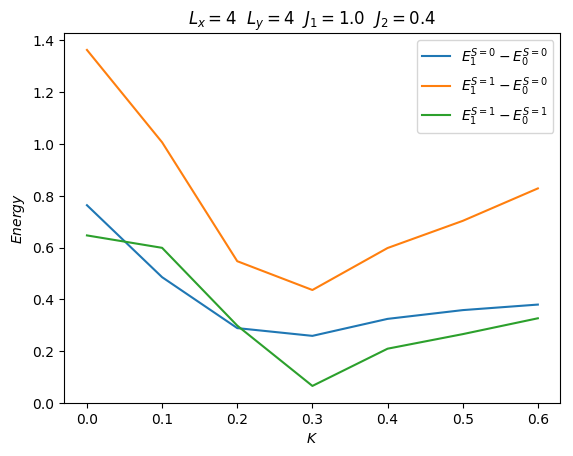

In [6]:
plot(K,S00Gap,label=L"E_1^{S=0} - E_0^{S=0}");
plot(K,S01Gap,label=L"E_1^{S=1} - E_0^{S=0}");
# plot(K,S02Gap,label=L"\Delta E_{\Delta S = 1}");
plot(K,S11Gap,label=L"E_1^{S=1} - E_0^{S=1}");
# plot(K,S22Gap,label=L"\Delta E_{S=2}");
title(L"L_x="*string(Lx)*L"\ \ L_y="*string(Ly)*L"\ \ J_1="*string(J1)*L"\ \ J_2="*string(J2););
xlabel(L"K");
ylabel(L"Energy");
legend();

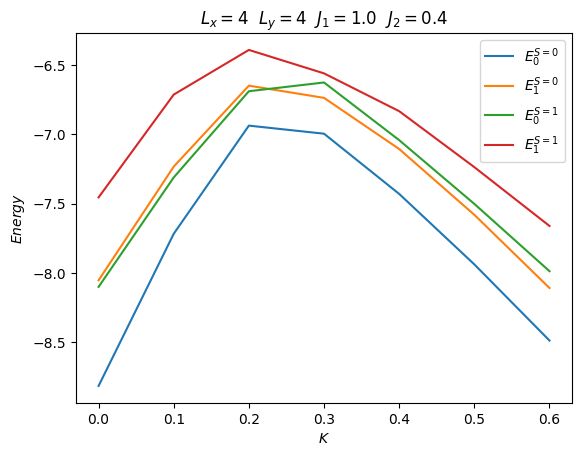

In [10]:
plot(K,E0_S0,label=L"E_0^{S=0}");
plot(K,E1_S0,label=L"E_1^{S=0}");
plot(K,E0_S1,label=L"E_0^{S=1}");
plot(K,E1_S1,label=L"E_1^{S=1}");
title(L"L_x="*string(Lx)*L"\ \ L_y="*string(Ly)*L"\ \ J_1="*string(J1)*L"\ \ J_2="*string(J2););
xlabel(L"K");
ylabel(L"Energy");
legend();